In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Define the problem

**Given**: describe the data  
**Goal**: what will you try to infer from that data  

%%% Example %%%  
**Given**: historical data of how much dollars a company spent on ads in different media (TV, radio, newspapers) and the respective sales.  

**Goal**: predict what will be the sales given a particular add spendings.
    

## Prepare the data (Data Preprocessing)

### Load the data

In [2]:
path_to_file = "../../datasets/various/Advertising.csv"
df = pd.read_csv(path_to_file, index_col=0)

### Get insight of the data (Prepare and clean)

In [3]:
print(df.head(5))

print(df.shape)
# print(data_df.columns.values.tolist())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


**TV**:  dollars spent on TV ads for a single product (in thousands)  
**radio**: dollars spent on radio ads (in thousands)  
**newspaper**: dollars spent on newspaper ads (in thousands)    

**sales**: sales of a single product in a given market (in thousands)

In [4]:
df.groupby('sales').max().sort_index(ascending=False).head(5)

,TV,radio,newspaper
sales,,,
27.0,276.9,48.9,41.8
26.2,287.6,43.0,71.8
25.5,283.6,42.0,66.2
25.4,289.7,49.0,51.2
24.7,220.3,49.0,3.2


#### Check for NaN values

In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

#### Visualize with Seaborn

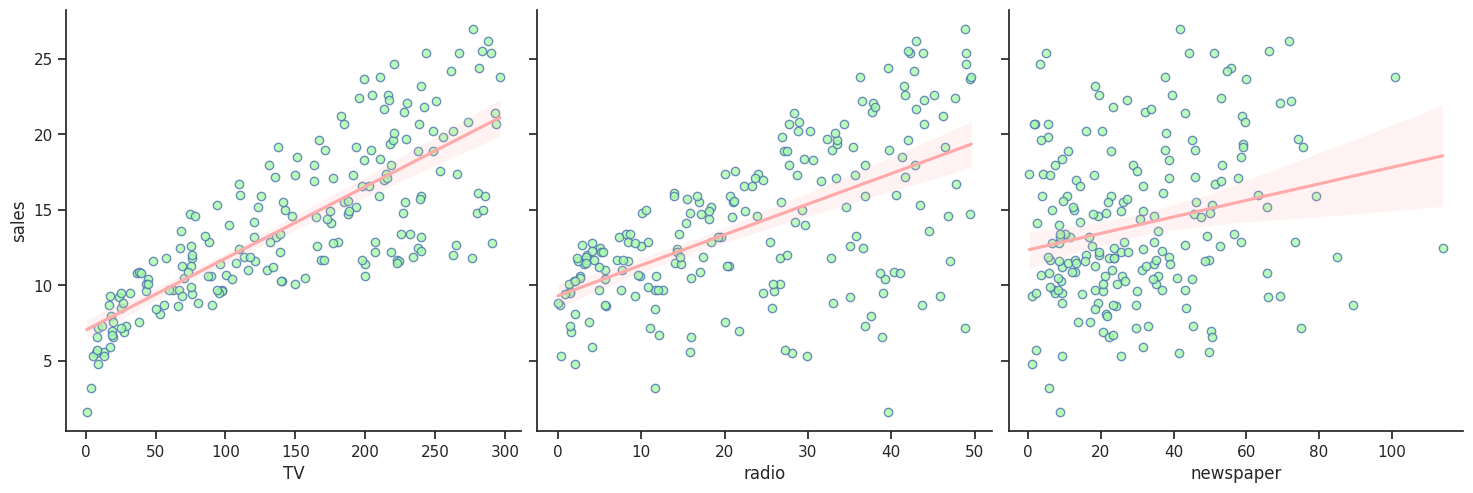

In [6]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,
             x_vars=['TV','radio','newspaper'],
             y_vars='sales',
             palette=sns.hls_palette(6, l=.6, s=.8),
             markers=["o"],
             plot_kws={'line_kws':{'color':'#FFAAAA'},
                       'scatter_kws':{'facecolors':'#AAFFAA'}},
             size=5, aspect=1,kind='reg')


In [7]:
# show correlations
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

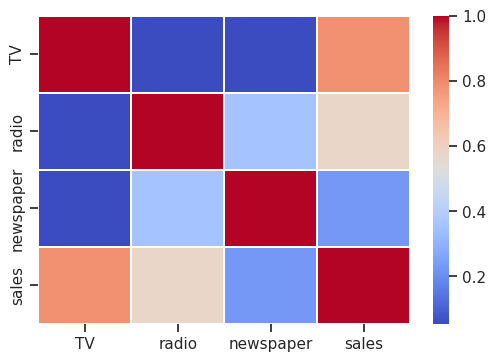

In [8]:
# make corr more colorful
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), linewidth=0.1, cmap="coolwarm")

## Select features

From the data inspection being made, I'll decide to use next columns as Features:

In [9]:
features = ['TV', 'radio']

In [10]:
X = df[features]
y = df['sales']
print(y.shape)

(200,)


## Separate the training data from the test data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (160, 2)
X_test shape: (40, 2)


## Choose the model

We saw some linear correlation between 'TV' ads and sales, that's why we are going to start with LinearRegression.

In [12]:
from sklearn.linear_model import LinearRegression

## Train the model (fit the model)

In [13]:
# instantiate the model
model = LinearRegression()

In [14]:
# train (fit) the model
fitted = model.fit(X_train,y_train)

In [15]:
# let's check the "learned" co-efficients:
print(fitted.intercept_)
print(fitted.coef_)

3.028255250783305
[0.0447283  0.19066726]


### Interpret the coefficients

## Predict (classify unknown input sample)

In [16]:
y_pred = fitted.predict(X_test)

## Evaluate the model

In [17]:
from sklearn import metrics

In [18]:
# get metrics:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

# print it
print('{:10s}: {:15.6f}. Best value: 0.0'.format('MAE: ', mae ) )
print('{:10s}: {:15.6f}. Best value: 0.0'.format('MSE: ', mse ) )
print('{:10s}: {:15.6f}. Best value: 0.0'.format('RMSE: ', rmse) )

print('{:10s}: {:15.6f}. Best value: 1.0'.format('r2_score', r2) )

MAE:      :        1.444302. Best value: 0.0
MSE:      :        3.137948. Best value: 0.0
RMSE:     :        1.771425. Best value: 0.0
r2_score  :        0.900583. Best value: 1.0
